In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# reading the dataset
df = pd.read_csv('data.csv')


In [3]:
# details about data
df.head()
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
# cleaning the data and removing the unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace = True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# checking if there any missing values, duplicate values

In [6]:

print('Missing values:')
df.isnull().sum()



Missing values:


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
print('Duplicate values:')
df.duplicated().sum()

Duplicate values:


0

In [8]:
print('Unique values:')
df['diagnosis'].unique()

Unique values:


array(['M', 'B'], dtype=object)

In [9]:
# converting Malignant to 1 and Bening to 0
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Visualizing the dataset

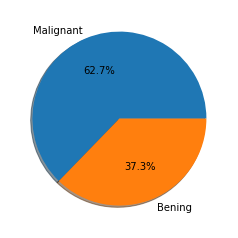

In [10]:
plt.pie(df['diagnosis'].value_counts(), labels = ['Malignant', 'Bening'], shadow = True,autopct='%1.1f%%')
plt.show()



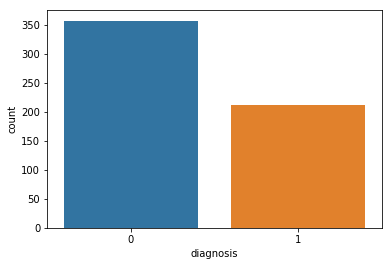

In [11]:
sns.countplot(df['diagnosis'], label = 'count')
plt.savefig('2.png', transparent=False)

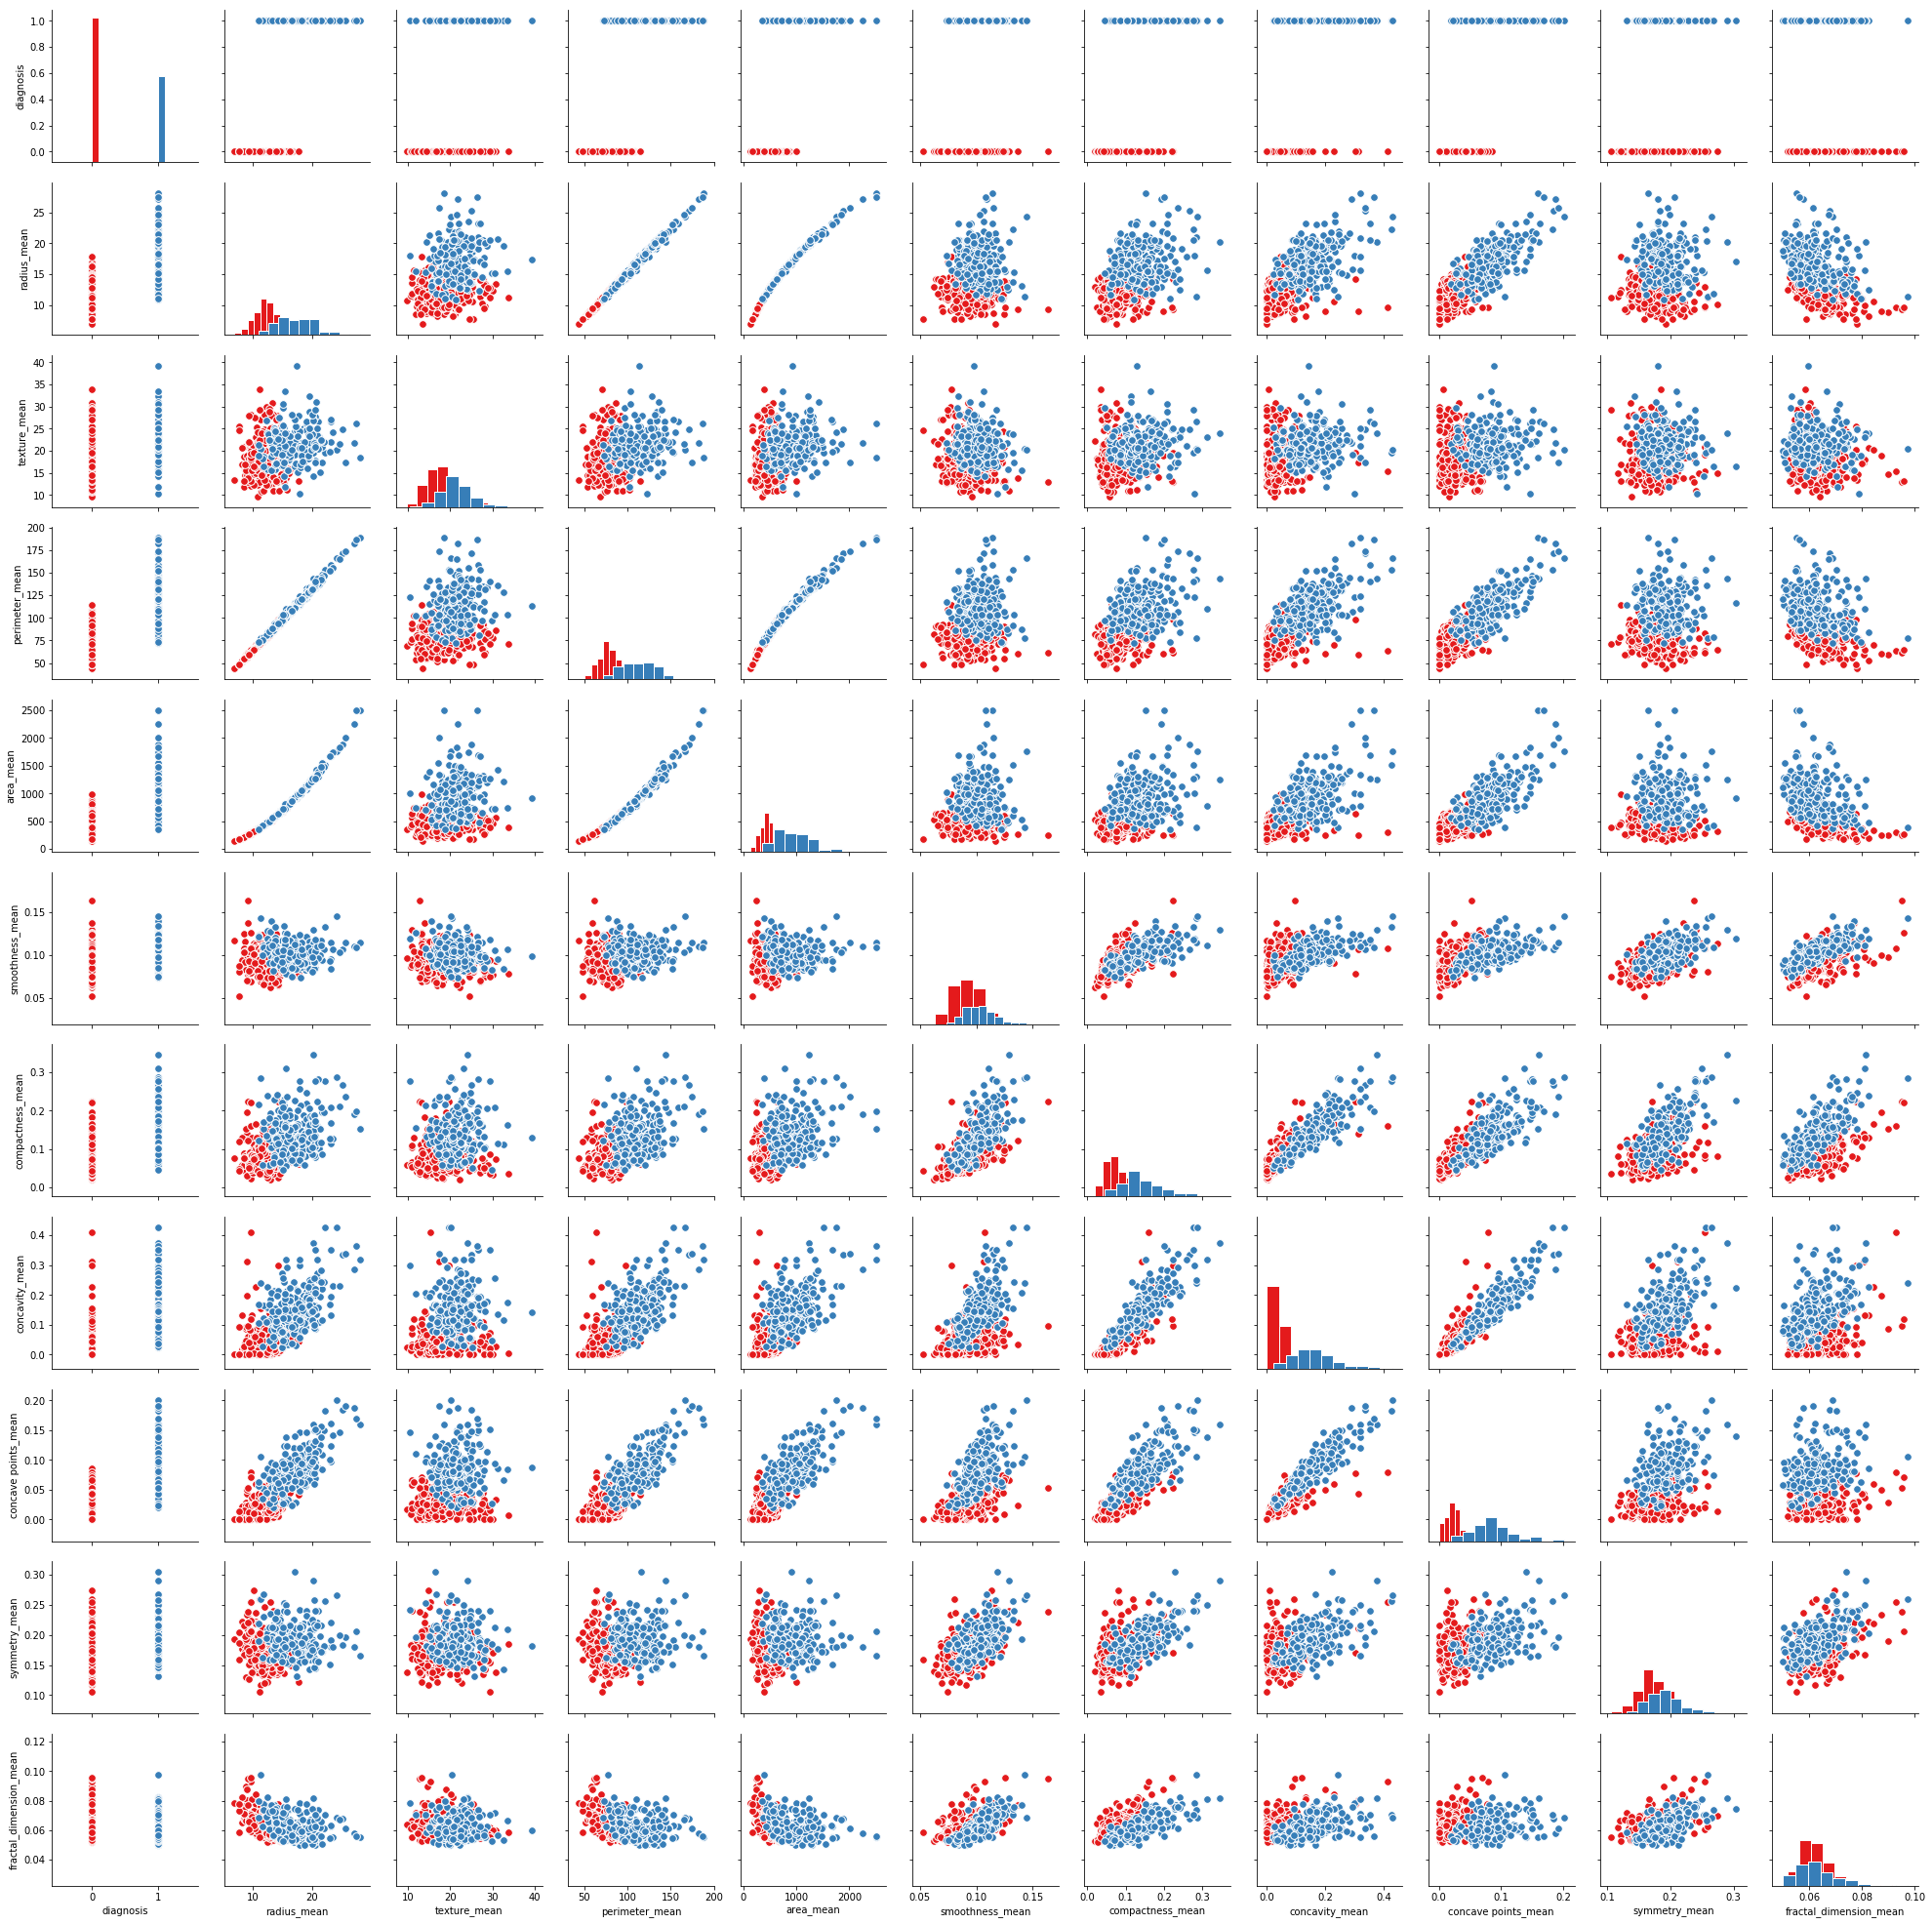

In [12]:
#  pairwise relationships in a dataset
graph = sns.PairGrid(df.iloc[:, 0:11], hue = 'diagnosis', palette = 'Set1')
graph = graph.map_diag(plt.hist, edgecolor='w')
graph = graph.map_offdiag(plt.scatter, edgecolor='w', s=60)
plt.show()

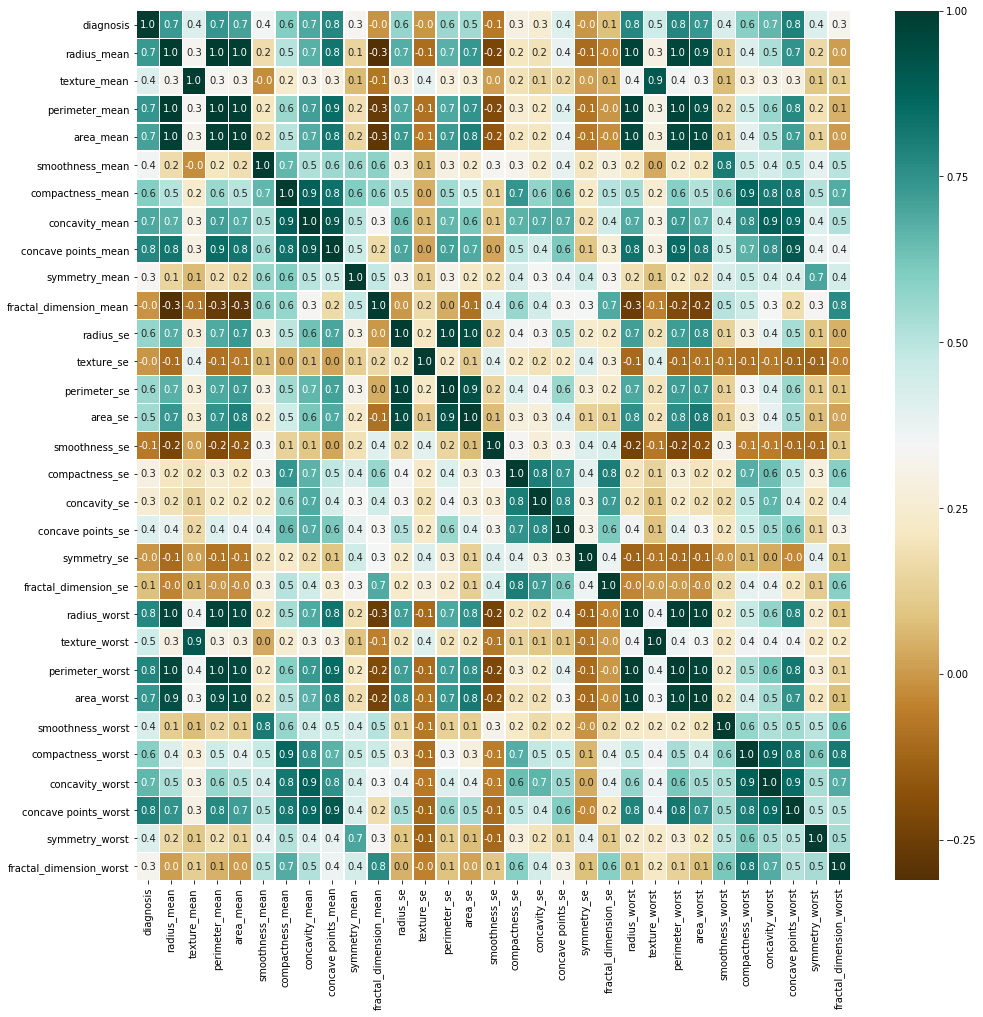

In [13]:
# using heatmap
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='BrBG')

# Split the dataset into train and test

In [14]:
X = df.drop('diagnosis', axis=1).values
Y = df['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 25)


In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


# Using KNN

accuracy: 0.9210526315789473
report

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        75
           1       0.94      0.82      0.88        39

   micro avg       0.92      0.92      0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



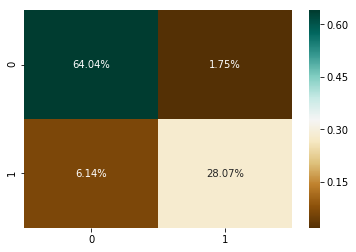

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
report = classification_report(Y_test, predictions)
print('accuracy:', accuracy)
print('report\n')
print(report)
results = []
model_names = []
results.append(accuracy)
model_names.append('KNN')
# confusion matrix
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='BrBG')

# Using Support Vector Machine

accuracy: 0.9385964912280702
report

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.92      0.90      0.91        39

   micro avg       0.94      0.94      0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



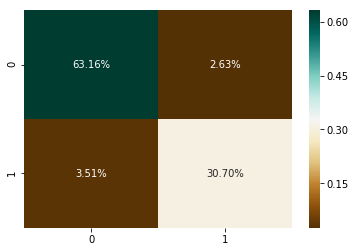

In [17]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
report = classification_report(Y_test, predictions)
print('accuracy:', accuracy)
print('report\n')
print(report)
results.append(accuracy)
model_names.append('SVM')
# confusion matrix
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='BrBG')


# Using Decision Tree

accuracy: 0.9210526315789473
report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        75
           1       0.89      0.87      0.88        39

   micro avg       0.92      0.92      0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



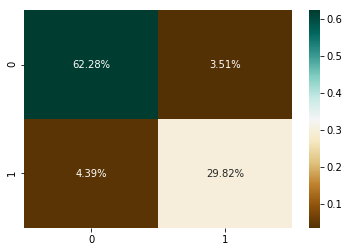

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
report = classification_report(Y_test, predictions)
print('accuracy:', accuracy)
print('report\n')
print(report)
results.append(accuracy)
model_names.append('DT')
# confusion matrix
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='BrBG')

# Using Gaussian Naive Bias

accuracy: 0.9122807017543859
report

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        75
           1       0.85      0.90      0.88        39

   micro avg       0.91      0.91      0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.91      0.91       114



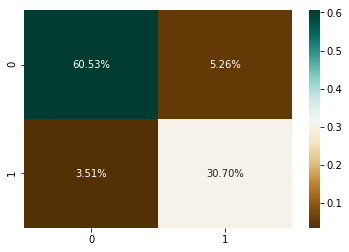

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
report = classification_report(Y_test, predictions)
print('accuracy:', accuracy)
print('report\n')
print(report)
results.append(accuracy)
model_names.append('GNB')
# confusion matrix
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='BrBG')


# Using Logistic Regression

accuracy: 0.9385964912280702
report

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.92      0.90      0.91        39

   micro avg       0.94      0.94      0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



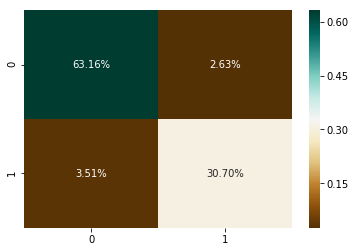

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear') # liblinear gives the best accuracy so that use liblinerar and also best for small database
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
report = classification_report(Y_test, predictions)
print('accuracy:', accuracy)
print('report\n')
print(report)
results.append(accuracy)
model_names.append('LR')
# confusion matrix
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='BrBG')


# Random Forest

 radius_mean, perimeter_mean and area_mean are correlated with each other I will use only radius_mean. 


Compactness_mean, concavity_mean, concave points_mean are correlated with each other will use concave points_mean.

radius_se, perimeter_se, area_se are correlated and I only use radius_se.

radius_worst, perimeter_worst, area_worst are correlated so I use area_worst.

Compactness_worst, concavity_worst, concave points_worst are correlated so I use concavity_worst.
Compactness_se, concavity_se, concave points_se are correlated so I use concavity_se.

texture_mean and texture_worst are correlated and I use texture_mean.

area_worst and area_mean are correlated, I use area_mean.

In [21]:
drop_list = ['perimeter_mean','area_mean', 'compactness_mean', 'concavity_mean', 'perimeter_se','area_se', 'perimeter_worst', 'radius_worst', 'compactness_worst', 
             'concave points_worst', 'compactness_se', 'concave points_se',
            'texture_worst', 'area_worst']
new_df = df.drop(drop_list, axis =1) # remove 13 columns
new_df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


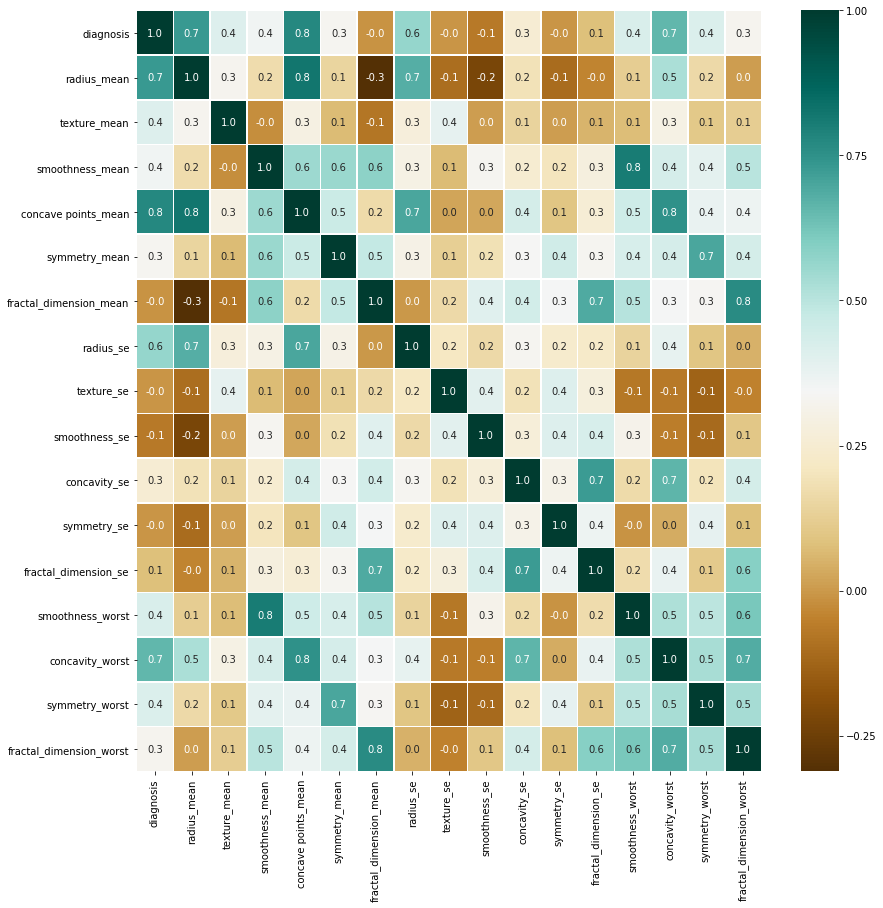

In [22]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(new_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='BrBG')
plt.savefig('heatmap_after.png', transparent=False)

In [23]:
# split the dataset again
X = df.drop('diagnosis', axis=1).values
Y = df['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 25)


accuracy: 0.9473684210526315
report

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        75
           1       0.95      0.90      0.92        39

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



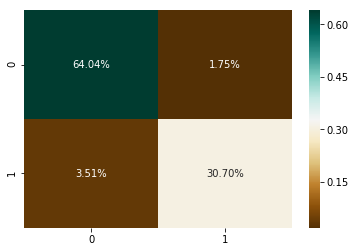

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
report = classification_report(Y_test, predictions)
print('accuracy:', accuracy)
print('report\n')
print(report)
results.append(accuracy)
model_names.append('RF')
# confusion matrix
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='BrBG')
plt.savefig('RM confusion.png')

# Compairing the models

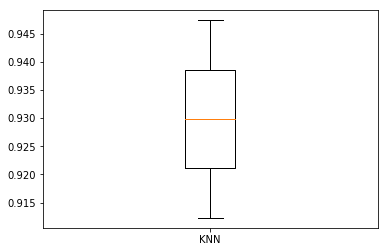

In [25]:
fig, ax = plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()


In [26]:
print(results)
print(model_names)

[0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.9473684210526315]
['KNN', 'SVM', 'DT', 'GNB', 'LR', 'RF']


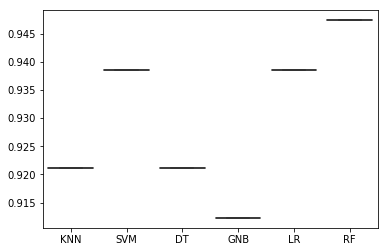

<Figure size 432x288 with 0 Axes>

In [58]:
sns.boxplot(x=model_names, y=results, palette='Blues')
plt.show()
plt.savefig('comparison.png', transparent=False)